In [ ]:
!pip install pandas scikit-learn numpy


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/USDA.csv')

# Display the first few rows of the dataset
print(data.head())

# Define feature columns and target variable
features = ['Sugar', 'SaturatedFat', 'Cholesterol', 'Calories']


     ID               Description  Calories  Protein  TotalFat  Carbohydrate  \
0  1001          BUTTER,WITH SALT     717.0     0.85     81.11          0.06   
1  1002  BUTTER,WHIPPED,WITH SALT     717.0     0.85     81.11          0.06   
2  1003      BUTTER OIL,ANHYDROUS     876.0     0.28     99.48          0.00   
3  1004               CHEESE,BLUE     353.0    21.40     28.74          2.34   
4  1005              CHEESE,BRICK     371.0    23.24     29.68          2.79   

   Sodium  SaturatedFat  Cholesterol  Sugar  Calcium  Iron  Potassium  \
0   714.0        51.368        215.0   0.06     24.0  0.02       24.0   
1   827.0        50.489        219.0   0.06     24.0  0.16       26.0   
2     2.0        61.924        256.0   0.00      4.0  0.00        5.0   
3  1395.0        18.669         75.0   0.50    528.0  0.31      256.0   
4   560.0        18.764         94.0   0.51    674.0  0.43      136.0   

   VitaminC  VitaminE  VitaminD  
0       0.0      2.32       1.5  
1       0.0 

In [ ]:
# Define risk categories based on dietary guidelines
def categorize_risk(row):
    if row['Calories'] < 2000:
        calorie_limit = 2000
    else:
        calorie_limit = 3000

    if (row['Sugar'] > 30) or (row['SaturatedFat'] > (calorie_limit * 0.07 / 9)) or (row['Cholesterol'] > 300):
        return 'high'
    elif (row['Sugar'] > 24) or (row['SaturatedFat'] > (calorie_limit * 0.05 / 9)) or (row['Cholesterol'] > 200):
        return 'moderate'
    else:
        return 'low'

In [ ]:
# Apply risk categorization
data['risk_category'] = data.apply(categorize_risk, axis=1)

# Split the data into features and target
X = data[features]
y = data['risk_category']


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 143    0    1]
 [   0 1196    0]
 [   0    0   72]]
              precision    recall  f1-score   support

        high       1.00      0.99      1.00       144
         low       1.00      1.00      1.00      1196
    moderate       0.99      1.00      0.99        72

    accuracy                           1.00      1412
   macro avg       1.00      1.00      1.00      1412
weighted avg       1.00      1.00      1.00      1412



In [ ]:
# Load the dataset
import pandas as pd
data = pd.read_csv('/content/USDA.csv')

# Display the first few rows of the dataset
print(data.head())

     ID               Description  Calories  Protein  TotalFat  Carbohydrate  \
0  1001          BUTTER,WITH SALT     717.0     0.85     81.11          0.06   
1  1002  BUTTER,WHIPPED,WITH SALT     717.0     0.85     81.11          0.06   
2  1003      BUTTER OIL,ANHYDROUS     876.0     0.28     99.48          0.00   
3  1004               CHEESE,BLUE     353.0    21.40     28.74          2.34   
4  1005              CHEESE,BRICK     371.0    23.24     29.68          2.79   

   Sodium  SaturatedFat  Cholesterol  Sugar  Calcium  Iron  Potassium  \
0   714.0        51.368        215.0   0.06     24.0  0.02       24.0   
1   827.0        50.489        219.0   0.06     24.0  0.16       26.0   
2     2.0        61.924        256.0   0.00      4.0  0.00        5.0   
3  1395.0        18.669         75.0   0.50    528.0  0.31      256.0   
4   560.0        18.764         94.0   0.51    674.0  0.43      136.0   

   VitaminC  VitaminE  VitaminD  
0       0.0      2.32       1.5  
1       0.0 

In [ ]:
def assess_health_risk(food_ids, age, gender):
    # Filter the dataset for selected food IDs
    selected_foods = data[data['ID'].isin(food_ids)]

    # Calculate total nutrient values
    total_calories = (selected_foods['Calories']).sum()  # Assuming 100g servings
    total_sugar = (selected_foods['Sugar'] ).sum()
    total_saturated_fats = (selected_foods['SaturatedFat']).sum()
    total_cholesterol = (selected_foods['Cholesterol']).sum()

    # Determine calorie limit based on age and gender
    if age < 19:
        calorie_limit = 2400 if gender == 'male' else 1800
    elif age < 31:
        calorie_limit = 3000 if gender == 'male' else 2400
    elif age < 60:
        calorie_limit = 3000 if gender == 'male' else 2200
    else:
        calorie_limit = 2600

    # Assess risks based on dietary guidelines
    sugar_risk = total_sugar > (30 if gender == 'male' else (24 if age < 10 else (19 if age < 7 else 30)))
    saturated_fat_risk = total_saturated_fats > (calorie_limit * 0.1)  # Convert % of calories to grams
    cholesterol_risk = total_cholesterol > (200 if 'risk_factor' in locals() and risk_factor else 300)

    # Compile results
    results = {
        "Total Calories": total_calories,
        "Total Sugar": total_sugar,
        "Total Saturated Fats": total_saturated_fats,
        "Total Cholesterol": total_cholesterol,
        "Sugar Risk": sugar_risk,
        "Saturated Fat Risk": saturated_fat_risk,
        "Cholesterol Risk": cholesterol_risk,
    }

    return results


In [ ]:
# Example user inputs
food_ids_input = [1001, 1005]  # Replace with actual food IDs from the dataset
age_input = int(input("Enter your age: "))
gender_input = input("Enter your gender (male/female): ").lower()

# Assess health risk based on user inputs
assessment_results = assess_health_risk(food_ids_input, age_input, gender_input)

# Display results
for key, value in assessment_results.items():
    print(f"{key}: {value}")


Enter your age: 20
Enter your gender (male/female): male
Total Calories: 1088.0
Total Sugar: 0.5700000000000001
Total Saturated Fats: 70.132
Total Cholesterol: 309.0
Sugar Risk: False
Saturated Fat Risk: False
Cholesterol Risk: True


In [ ]:
def assess_health_risk(food_ids, age, gender):
    # Filter the dataset for selected food IDs
    selected_foods = data[data['ID'].isin(food_ids)]

    # Calculate total nutrient values
    total_calories = selected_foods['Calories'].sum()  # Assuming 100g servings
    total_sugar = (selected_foods['Sugar'] ).sum()
    total_saturated_fats = selected_foods['SaturatedFat'].sum()
    total_cholesterol = selected_foods['Cholesterol'].sum()  # in milligrams
    total_protein = selected_foods['Protein'].sum()
    total_fat = selected_foods['TotalFat'].sum()
    total_carbohydrates = selected_foods['Carbohydrate'].sum()

    # Determine optimal calorie limit based on age and gender
    if age < 19:
        calorie_limit = 2400 if gender == 'male' else 1800
    elif age < 31:
        calorie_limit = 3000 if gender == 'male' else 2400
    elif age < 60:
        calorie_limit = 3000 if gender == 'male' else 2200
    else:
        calorie_limit = 2600

    # Assess risks based on dietary guidelines
    sugar_risk = total_sugar > (30 if gender == 'male' else (24 if age < 10 else (19 if age < 7 else 30)))
    saturated_fat_risk = total_saturated_fats > (calorie_limit * 0.1)  # Convert % of calories to grams
    cholesterol_risk = total_cholesterol > (200 if 'risk_factor' in locals() and risk_factor else 300)

    # Calculate protein needs (0.8 grams of protein per kg of body weight)
    ideal_body_weight_kg = 70  # Replace with actual body weight input or calculation
    protein_needs = ideal_body_weight_kg * 0.8

    # Compile results
    results = {
        "Total Calories": total_calories,
        "Total Sugar": total_sugar,
        "Total Saturated Fats": total_saturated_fats,
        "Total Cholesterol (mg)": total_cholesterol,
        "Total Protein": total_protein,
        "Total Fat": total_fat,
        "Total Carbohydrates": total_carbohydrates,
        "Sugar Risk": sugar_risk,
        "Saturated Fat Risk": saturated_fat_risk,
        "Cholesterol Risk": cholesterol_risk,
        "Optimal Calories": calorie_limit,
        "Protein Needs": protein_needs,
    }

    # Suggestions for weight management
    if total_calories > calorie_limit:
        results["Suggestion"] = ("To lose weight, you can consume fewer calories than your body needs, "
                                  "creating a calorie deficit. A safe and sustainable rate of weight loss "
                                  "is about 1–2 pounds per week, which is a calorie deficit of "
                                  "500–1,000 calories per day.")
    elif total_calories < calorie_limit:
        results["Suggestion"] = ("To gain weight, you can consume more calories than your body needs. "
                                  "Aim for a surplus of about 250–500 calories per day for a gradual weight gain.")
    else:
        results["Suggestion"] = "Your caloric intake is optimal for your age and gender."

    return results


In [ ]:
# Example user inputs
food_ids_input = [1001, 1005]  # Replace with actual food IDs from the dataset
age_input = int(input("Enter your age: "))
gender_input = input("Enter your gender (male/female): ").lower()

# Assess health risk based on user inputs
assessment_results = assess_health_risk(food_ids_input, age_input, gender_input)

# Display results
for key, value in assessment_results.items():
    print(f"{key}: {value}")


Enter your age: 20
Enter your gender (male/female): male
Total Calories: 1088.0
Total Sugar: 0.5700000000000001
Total Saturated Fats: 70.132
Total Cholesterol (mg): 309.0
Total Protein: 24.09
Total Fat: 110.78999999999999
Total Carbohydrates: 2.85
Sugar Risk: False
Saturated Fat Risk: False
Cholesterol Risk: True
Optimal Calories: 3000
Protein Needs: 56.0
Suggestion: To gain weight, you can consume more calories than your body needs. Aim for a surplus of about 250–500 calories per day for a gradual weight gain.


In [ ]:
#final one
def assess_health_risk(food_ids, age, gender, weight):
    # Filter the dataset for selected food IDs
    selected_foods = data[data['ID'].isin(food_ids)]

    # Calculate total nutrient values
    total_calories = selected_foods['Calories'].sum()  # Assuming 100g servings
    total_sugar = (selected_foods['Sugar']).sum()
    total_saturated_fats = selected_foods['SaturatedFat'].sum()
    total_cholesterol = selected_foods['Cholesterol'].sum()  # in milligrams
    total_protein = selected_foods['Protein'].sum()
    total_fat = selected_foods['TotalFat'].sum()
    total_carbohydrates = selected_foods['Carbohydrate'].sum()

    # Determine optimal calorie limit based on age and gender
    if age < 19:
        calorie_limit = 2400 if gender == 'male' else 1800
    elif age < 31:
        calorie_limit = 3000 if gender == 'male' else 2400
    elif age < 60:
        calorie_limit = 3000 if gender == 'male' else 2200
    else:
        calorie_limit = 2600

    # Assess risks based on dietary guidelines
    sugar_risk = total_sugar > (30 if gender == 'male' else (24 if age < 10 else (19 if age < 7 else 30)))
    saturated_fat_risk = total_saturated_fats > (calorie_limit * 0.1)  # Convert % of calories to grams
    cholesterol_risk = total_cholesterol > (200 if 'risk_factor' in locals() and risk_factor else 300)

    # Calculate protein needs (0.8 grams of protein per kg of body weight)
    protein_needs = weight * 0.8

    # Compile results
    results = {
        "Total Calories": total_calories,
        "Total Sugar": total_sugar,
        "Total Saturated Fats": total_saturated_fats,
        "Total Cholesterol (mg)": total_cholesterol,
        "Total Protein": total_protein,
        "Total Fat": total_fat,
        "Total Carbohydrates": total_carbohydrates,
        "Sugar Risk": sugar_risk,
        "Saturated Fat Risk": saturated_fat_risk,
        "Cholesterol Risk": cholesterol_risk,
        "Optimal Calories": calorie_limit,
        "Protein Needs": protein_needs,
    }

    # Suggestions for weight management
    if total_calories > calorie_limit:
        results["Suggestion"] = ("To lose weight, you can consume fewer calories than your body needs, "
                                  "creating a calorie deficit. A safe and sustainable rate of weight loss "
                                  "is about 1–2 pounds per week, which is a calorie deficit of "
                                  "500–1,000 calories per day.")
    elif total_calories < calorie_limit:
        results["Suggestion"] = ("To gain weight, you can consume more calories than your body needs. "
                                  "Aim for a surplus of about 250–500 calories per day for gradual weight gain.")
    else:
        results["Suggestion"] = "Your caloric intake is optimal for your age and gender."

    return results


In [ ]:
# Example user inputs
food_ids_input = [1001, 1005]  # Replace with actual food IDs from the dataset

age_input = int(input("Enter your age: "))
gender_input = input("Enter your gender (male/female): ").lower()
weight_input = float(input("Enter your weight in kg: "))  # User inputs their weight

# Assess health risk based on user inputs
assessment_results = assess_health_risk(food_ids_input, age_input, gender_input, weight_input)

# Display results
for key, value in assessment_results.items():
    print(f"{key}: {value}")


Enter your age: 20
Enter your gender (male/female): male
Enter your weight in kg: 70
Total Calories: 1088.0
Total Sugar: 0.5700000000000001
Total Saturated Fats: 70.132
Total Cholesterol (mg): 309.0
Total Protein: 24.09
Total Fat: 110.78999999999999
Total Carbohydrates: 2.85
Sugar Risk: False
Saturated Fat Risk: False
Cholesterol Risk: True
Optimal Calories: 3000
Protein Needs: 56.0
Suggestion: To gain weight, you can consume more calories than your body needs. Aim for a surplus of about 250–500 calories per day for gradual weight gain.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Load the dataset
import pandas as pd
data = pd.read_csv('/content/USDA.csv')

# Display the first few rows of the dataset
print(data.head())

     ID               Description  Calories  Protein  TotalFat  Carbohydrate  \
0  1001          BUTTER,WITH SALT     717.0     0.85     81.11          0.06   
1  1002  BUTTER,WHIPPED,WITH SALT     717.0     0.85     81.11          0.06   
2  1003      BUTTER OIL,ANHYDROUS     876.0     0.28     99.48          0.00   
3  1004               CHEESE,BLUE     353.0    21.40     28.74          2.34   
4  1005              CHEESE,BRICK     371.0    23.24     29.68          2.79   

   Sodium  SaturatedFat  Cholesterol  Sugar  Calcium  Iron  Potassium  \
0   714.0        51.368        215.0   0.06     24.0  0.02       24.0   
1   827.0        50.489        219.0   0.06     24.0  0.16       26.0   
2     2.0        61.924        256.0   0.00      4.0  0.00        5.0   
3  1395.0        18.669         75.0   0.50    528.0  0.31      256.0   
4   560.0        18.764         94.0   0.51    674.0  0.43      136.0   

   VitaminC  VitaminE  VitaminD  
0       0.0      2.32       1.5  
1       0.0 

In [ ]:
# Data cleaning: Drop rows with missing target values (if any)
data.dropna(subset=['Cholesterol', 'Sugar', 'Calories'], inplace=True)

# Define risk categories based on dietary guidelines
def categorize_risk(row):
    if row['Sugar'] > 30  or row['Cholesterol'] > 300:
        return 'high'
    elif row['Sugar'] > 20  or row['Cholesterol'] > 200:
        return 'moderate'
    else:
        return 'low'

# Apply risk categorization
data['risk_category'] = data.apply(categorize_risk, axis=1)

# Features and target variable
features = ['Calories', 'Sugar', 'Cholesterol']
X = data[features]
y = data['risk_category']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[104   0   0]
 [  0 835   0]
 [  0   1  54]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       835
           2       1.00      0.98      0.99        55

    accuracy                           1.00       994
   macro avg       1.00      0.99      1.00       994
weighted avg       1.00      1.00      1.00       994



In [ ]:
# Function to assess health risk using ML model
def assess_health_risk_ml(food_ids):
    selected_foods = data[data['ID'].isin(food_ids)]
    input_features = selected_foods[features].sum().values.reshape(1, -1)  # Sum features for selected foods
    input_features_scaled = scaler.transform(input_features)

    risk_prediction = model.predict(input_features_scaled)
    risk_category = label_encoder.inverse_transform(risk_prediction)[0]

    return risk_category

In [ ]:
# Example usage of ML function
food_ids_input = [1001, 1005]  # Replace with actual food IDs from user input
predicted_risk_category = assess_health_risk_ml(food_ids_input)
print(f"Predicted Risk Category: {predicted_risk_category}")

Predicted Risk Category: moderate


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
pip install --upgrade scikit-learn

     ID               Description  Calories  Protein  TotalFat  Carbohydrate  \
0  1001          BUTTER,WITH SALT     717.0     0.85     81.11          0.06   
1  1002  BUTTER,WHIPPED,WITH SALT     717.0     0.85     81.11          0.06   
2  1003      BUTTER OIL,ANHYDROUS     876.0     0.28     99.48          0.00   
3  1004               CHEESE,BLUE     353.0    21.40     28.74          2.34   
4  1005              CHEESE,BRICK     371.0    23.24     29.68          2.79   

   Sodium  SaturatedFat  Cholesterol  Sugar  Calcium  Iron  Potassium  \
0   714.0        51.368        215.0   0.06     24.0  0.02       24.0   
1   827.0        50.489        219.0   0.06     24.0  0.16       26.0   
2     2.0        61.924        256.0   0.00      4.0  0.00        5.0   
3  1395.0        18.669         75.0   0.50    528.0  0.31      256.0   
4   560.0        18.764         94.0   0.51    674.0  0.43      136.0   

   VitaminC  VitaminE  VitaminD  
0       0.0      2.32       1.5  
1       0.0 

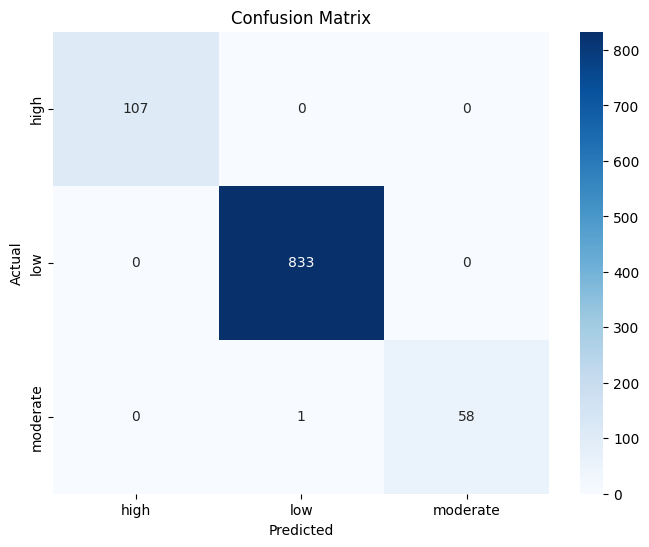

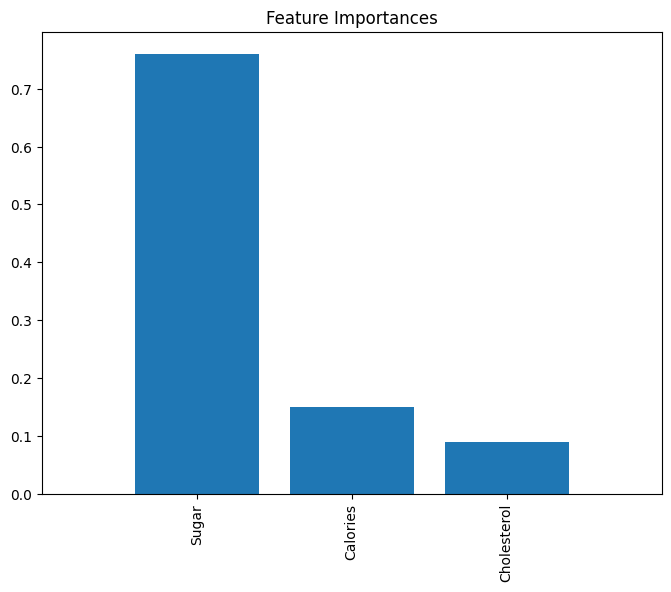

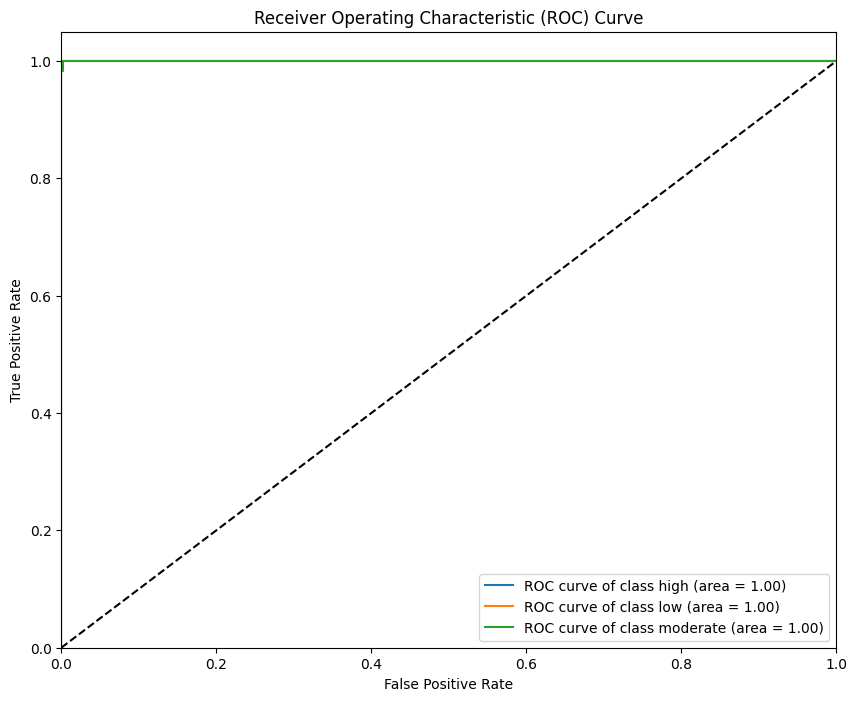

Cross-Validation Scores: [1.         0.99749687 0.99874844 0.99874844 1.        ]
Mean CV Score: 0.9989987484355444
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Predicted Risk Category: moderate


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Load the dataset
import pandas as pd
data = pd.read_csv('/content/USDA.csv')

# Display the first few rows of the dataset
print(data.head())

# Data cleaning: Drop rows with missing target values (if any)
data.dropna(subset=['Cholesterol', 'Sugar', 'Calories'], inplace=True)

# Define risk categories based on dietary guidelines
def categorize_risk(row):
    if row['Sugar'] > 30 or row['Cholesterol'] > 300:
        return 'high'
    elif row['Sugar'] > 20 or row['Cholesterol'] > 200:
        return 'moderate'
    else:
        return 'low'

# Apply risk categorization
data['risk_category'] = data.apply(categorize_risk, axis=1)

# Features and target variable
features = ['Calories', 'Sugar', 'Cholesterol']
X = data[features]
y = data['risk_category']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1 ]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Manually compute and plot ROC Curve
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, i], pos_label=i)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'ROC curve of class {label_encoder.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Cross-Validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

# Function to assess health risk using ML model
def assess_health_risk_ml(food_ids):
    selected_foods = data[data['ID'].isin(food_ids)]
    input_features = selected_foods[features].sum().values.reshape(1, -1)  # Sum features for selected foods
    input_features_scaled = scaler.transform(input_features)

    risk_prediction = model.predict(input_features_scaled)
    risk_category = label_encoder.inverse_transform(risk_prediction)[0]

    return risk_category

# Example usage of ML function
food_ids_input = [1001, 1005]  # Replace with actual food IDs from user input
predicted_risk_category = assess_health_risk_ml(food_ids_input)
print(f"Predicted Risk Category: {predicted_risk_category}")

     ID               Description  Calories  Protein  TotalFat  Carbohydrate  \
0  1001          BUTTER,WITH SALT     717.0     0.85     81.11          0.06   
1  1002  BUTTER,WHIPPED,WITH SALT     717.0     0.85     81.11          0.06   
2  1003      BUTTER OIL,ANHYDROUS     876.0     0.28     99.48          0.00   
3  1004               CHEESE,BLUE     353.0    21.40     28.74          2.34   
4  1005              CHEESE,BRICK     371.0    23.24     29.68          2.79   

   Sodium  SaturatedFat  Cholesterol  Sugar  Calcium  Iron  Potassium  \
0   714.0        51.368        215.0   0.06     24.0  0.02       24.0   
1   827.0        50.489        219.0   0.06     24.0  0.16       26.0   
2     2.0        61.924        256.0   0.00      4.0  0.00        5.0   
3  1395.0        18.669         75.0   0.50    528.0  0.31      256.0   
4   560.0        18.764         94.0   0.51    674.0  0.43      136.0   

   VitaminC  VitaminE  VitaminD  
0       0.0      2.32       1.5  
1       0.0 

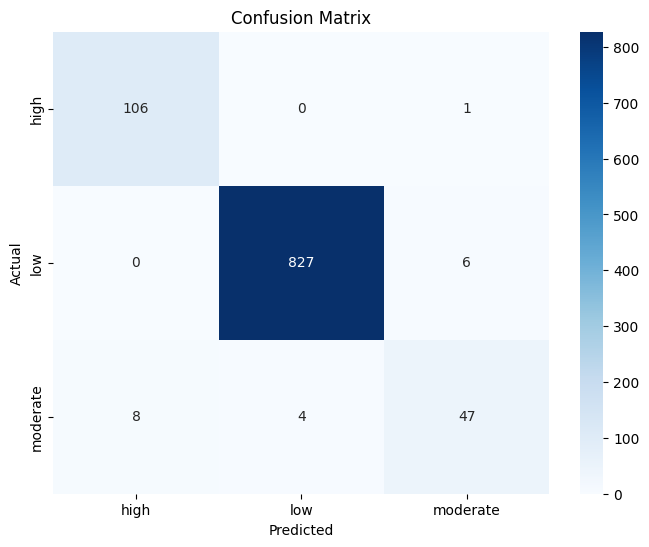

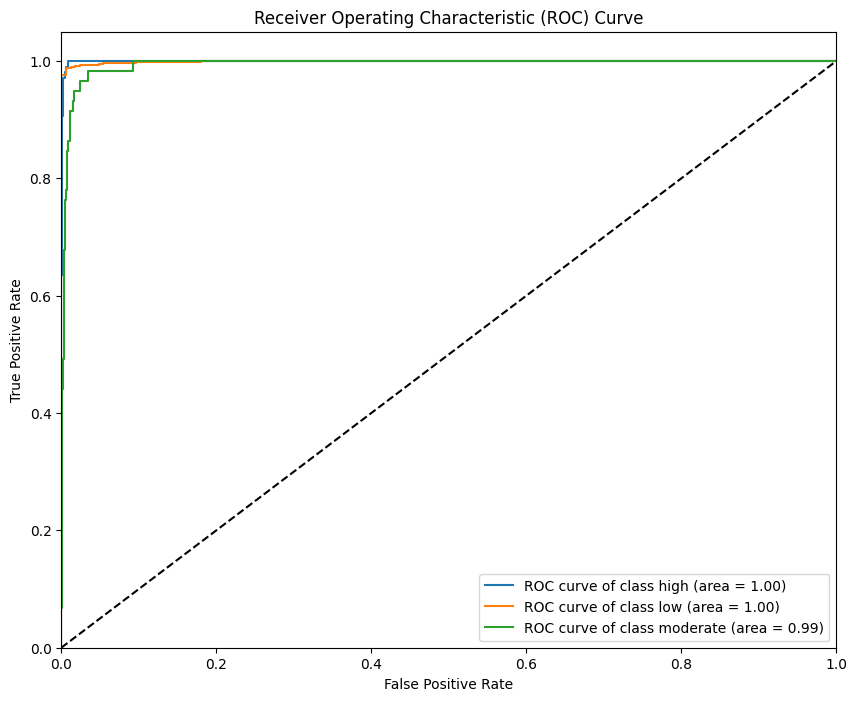

Cross-Validation Scores: [0.98875    0.99499374 0.99499374 0.98998748 0.99499374]
Mean CV Score: 0.9927437421777222


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'C': 100, 'solver': 'saga'}
Predicted Risk Category: high


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Load the dataset
import pandas as pd
data = pd.read_csv('/content/USDA.csv')

# Display the first few rows of the dataset
print(data.head())


# Data cleaning: Drop rows with missing target values (if any)
data.dropna(subset=['Cholesterol', 'Sugar', 'Calories'], inplace=True)

# Define risk categories based on dietary guidelines
def categorize_risk(row):
    if row['Sugar'] > 30 or row['Cholesterol'] > 300:
        return 'high'
    elif row['Sugar'] > 20 or row['Cholesterol'] > 200:
        return 'moderate'
    else:
        return 'low'

# Apply risk categorization
data['risk_category'] = data.apply(categorize_risk, axis=1)

# Features and target variable
features = ['Calories', 'Sugar', 'Cholesterol']
X = data[features]
y = data['risk_category']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Manually compute and plot ROC Curve
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, i], pos_label=i)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'ROC curve of class {label_encoder.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Cross-Validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

# Hyperparameter Tuning (if needed)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Solvers that support L1 regularization
}

grid_search = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

# Function to assess health risk using ML model
def assess_health_risk_ml(food_ids):
    selected_foods = data[data['ID'].isin(food_ids)]
    input_features = selected_foods[features].sum().values.reshape(1, -1)  # Sum features for selected foods
    input_features_scaled = scaler.transform(input_features)

    risk_prediction = model.predict(input_features_scaled)
    risk_category = label_encoder.inverse_transform(risk_prediction)[0]

    return risk_category

# Example usage of ML function
food_ids_input = [1001, 1005]  # Replace with actual food IDs from user input
predicted_risk_category = assess_health_risk_ml(food_ids_input)
print(f"Predicted Risk Category: {predicted_risk_category}")

     ID               Description  Calories  Protein  TotalFat  Carbohydrate  \
0  1001          BUTTER,WITH SALT     717.0     0.85     81.11          0.06   
1  1002  BUTTER,WHIPPED,WITH SALT     717.0     0.85     81.11          0.06   
2  1003      BUTTER OIL,ANHYDROUS     876.0     0.28     99.48          0.00   
3  1004               CHEESE,BLUE     353.0    21.40     28.74          2.34   
4  1005              CHEESE,BRICK     371.0    23.24     29.68          2.79   

   Sodium  SaturatedFat  Cholesterol  Sugar  Calcium  Iron  Potassium  \
0   714.0        51.368        215.0   0.06     24.0  0.02       24.0   
1   827.0        50.489        219.0   0.06     24.0  0.16       26.0   
2     2.0        61.924        256.0   0.00      4.0  0.00        5.0   
3  1395.0        18.669         75.0   0.50    528.0  0.31      256.0   
4   560.0        18.764         94.0   0.51    674.0  0.43      136.0   

   VitaminC  VitaminE  VitaminD  
0       0.0      2.32       1.5  
1       0.0 

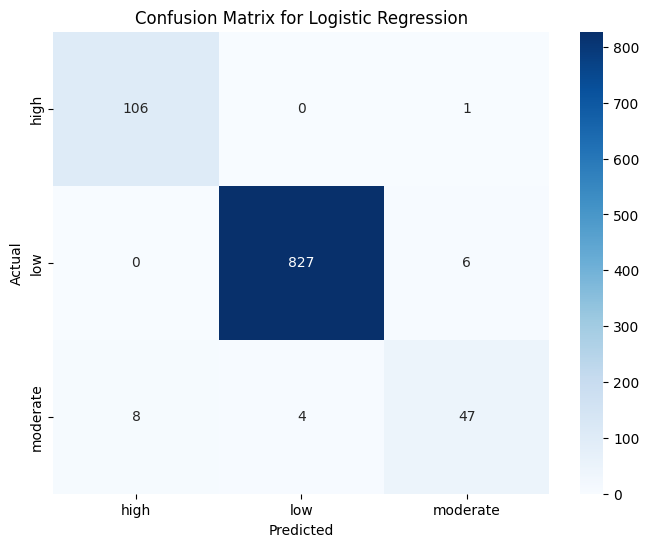

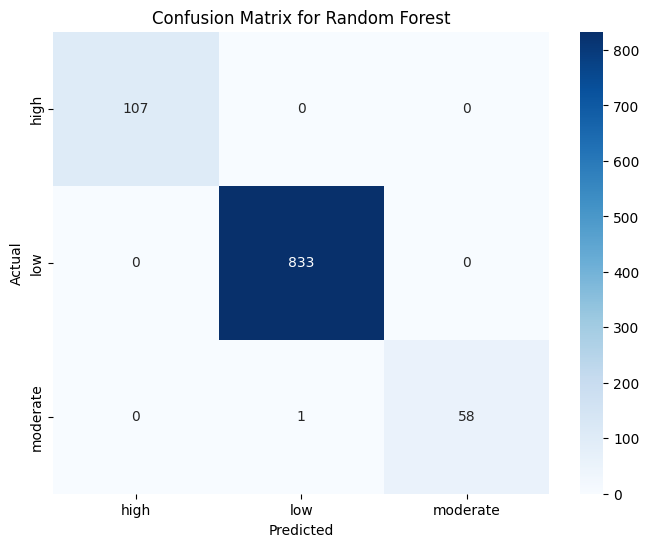

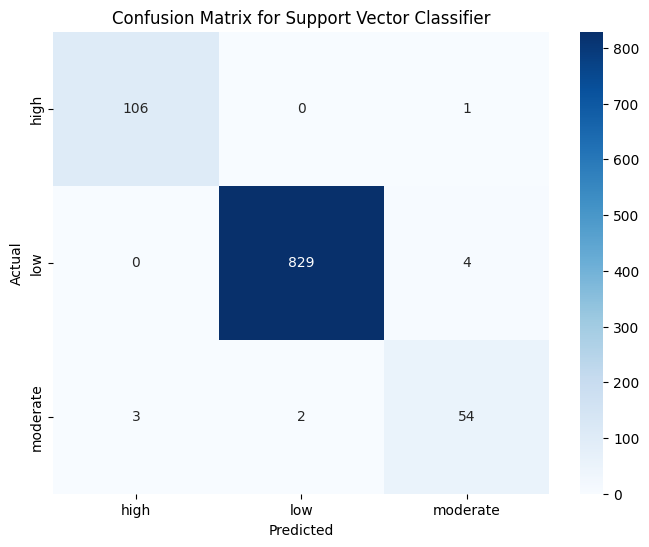

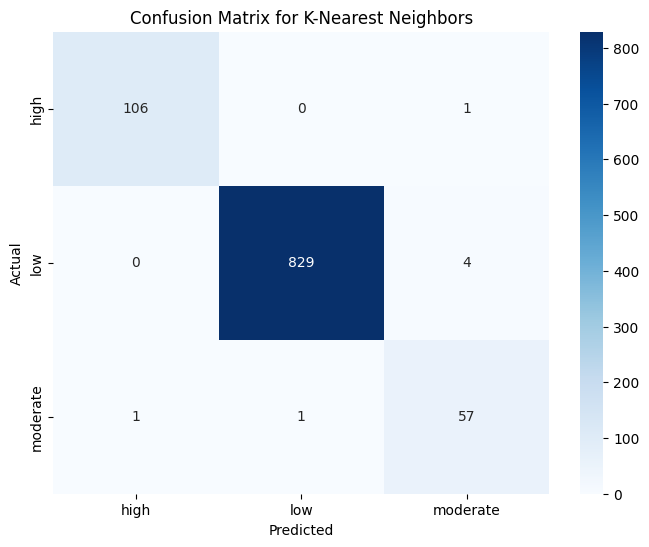

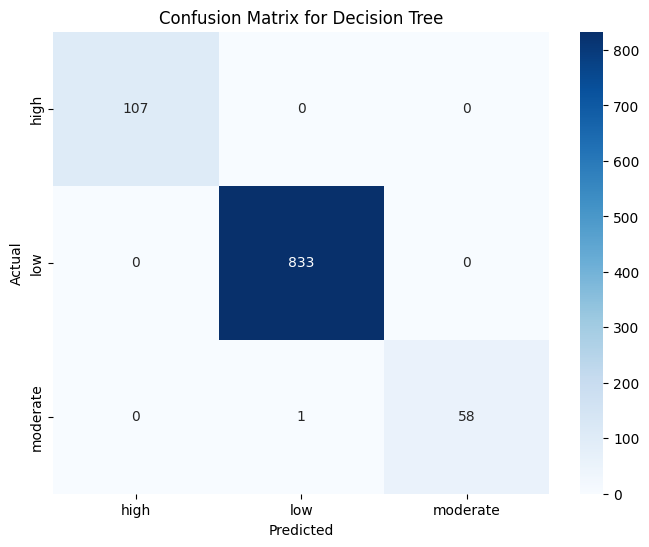

Best Model: Random Forest with Accuracy: 1.00
Classification Report for Ensemble Model:

              precision    recall  f1-score   support

        high       0.99      1.00      1.00       107
         low       1.00      1.00      1.00       833
    moderate       0.98      0.97      0.97        59

    accuracy                           1.00       999
   macro avg       0.99      0.99      0.99       999
weighted avg       1.00      1.00      1.00       999



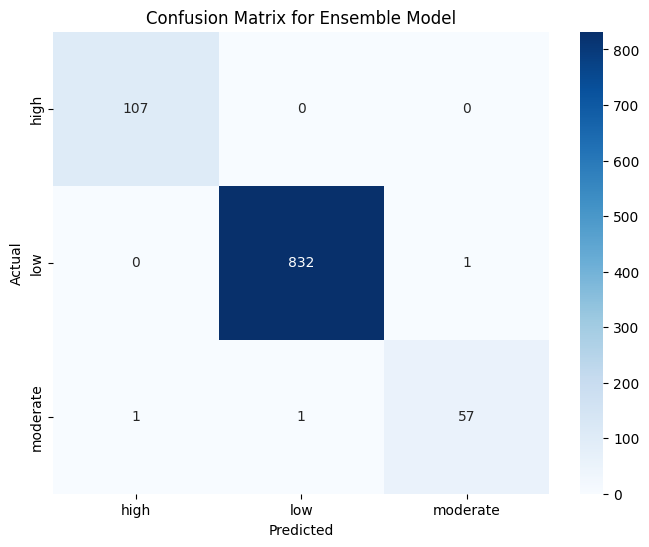

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
import pandas as pd
data = pd.read_csv('/content/USDA.csv')

# Display the first few rows of the dataset
print(data.head())


# Data cleaning: Drop rows with missing target values (if any)
data.dropna(subset=['Cholesterol', 'Sugar', 'Calories'], inplace=True)

# Define risk categories based on dietary guidelines
def categorize_risk(row):
    if row['Sugar'] > 30 or row['Cholesterol'] > 300:
        return 'high'
    elif row['Sugar'] > 20 or row['Cholesterol'] > 200:
        return 'moderate'
    else:
        return 'low'

# Apply risk categorization
data['risk_category'] = data.apply(categorize_risk, axis=1)

# Features and target variable
features = ['Calories', 'Sugar', 'Cholesterol']
X = data[features]
y = data['risk_category']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Classifier': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Evaluate each model and store results
model_reports = {}
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Generate classification report
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
    model_reports[model_name] = report['accuracy']  # Store accuracy for comparison

    # Confusion Matrix Heatmap
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Identify the best model based on accuracy
best_model_name = max(model_reports, key=model_reports.get)
print(f"Best Model: {best_model_name} with Accuracy: {model_reports[best_model_name]:.2f}")

# Create an ensemble model using the best models
# For demonstration, let's use Random Forest and Logistic Regression as base models
ensemble_model = VotingClassifier(estimators=[
    ('logistic', LogisticRegression(max_iter=200)),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42))
], voting='soft')

# Fit the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Make predictions with the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

# Generate classification report for the ensemble model
print(f"Classification Report for Ensemble Model:\n")
print(classification_report(y_test, y_pred_ensemble, target_names=label_encoder.classes_))

# Confusion Matrix Heatmap for the ensemble model
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ensemble, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel ('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Ensemble Model')
plt.show()

     ID               Description  Calories  Protein  TotalFat  Carbohydrate  \
0  1001          BUTTER,WITH SALT     717.0     0.85     81.11          0.06   
1  1002  BUTTER,WHIPPED,WITH SALT     717.0     0.85     81.11          0.06   
2  1003      BUTTER OIL,ANHYDROUS     876.0     0.28     99.48          0.00   
3  1004               CHEESE,BLUE     353.0    21.40     28.74          2.34   
4  1005              CHEESE,BRICK     371.0    23.24     29.68          2.79   

   Sodium  SaturatedFat  Cholesterol  Sugar  Calcium  Iron  Potassium  \
0   714.0        51.368        215.0   0.06     24.0  0.02       24.0   
1   827.0        50.489        219.0   0.06     24.0  0.16       26.0   
2     2.0        61.924        256.0   0.00      4.0  0.00        5.0   
3  1395.0        18.669         75.0   0.50    528.0  0.31      256.0   
4   560.0        18.764         94.0   0.51    674.0  0.43      136.0   

   VitaminC  VitaminE  VitaminD  
0       0.0      2.32       1.5  
1       0.0 

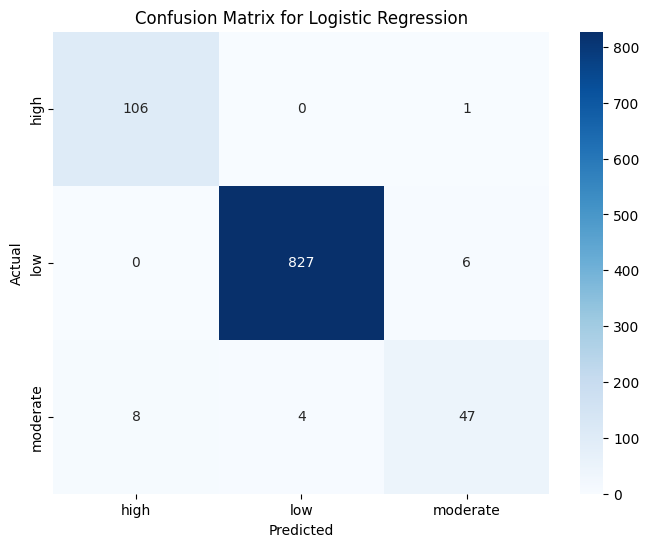

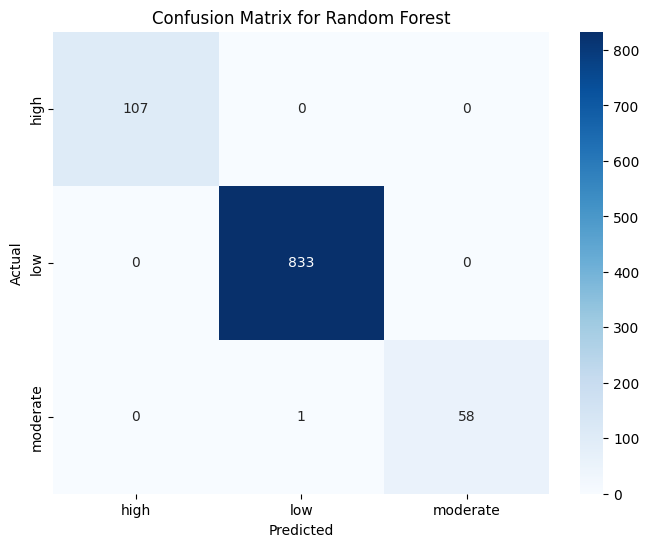

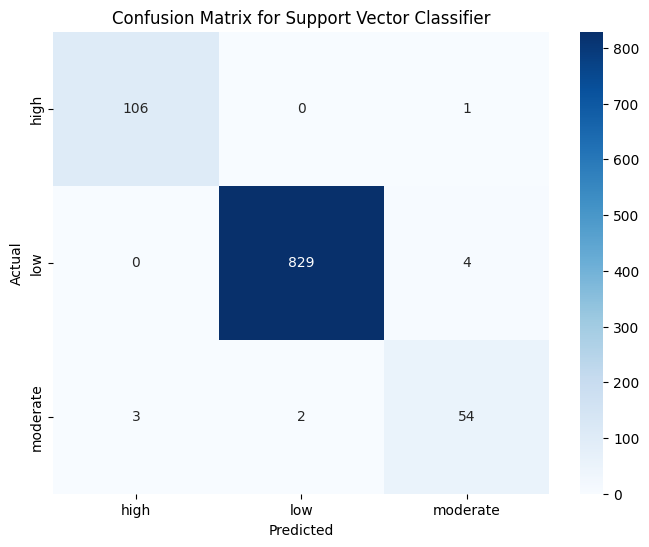

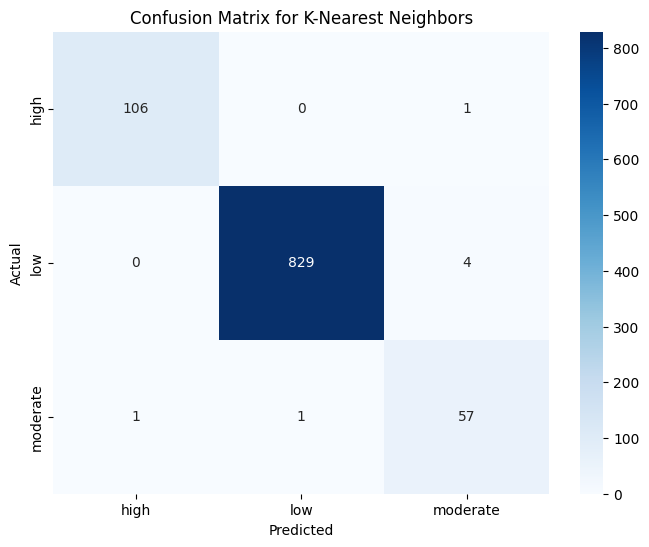

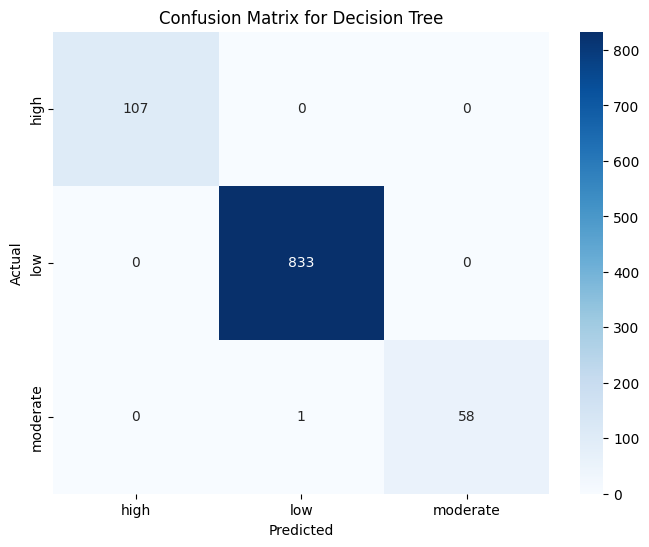

Best Model: Random Forest with Accuracy: 1.00
Classification Report for Ensemble Model:

              precision    recall  f1-score   support

        high       0.99      1.00      1.00       107
         low       1.00      1.00      1.00       833
    moderate       0.98      0.97      0.97        59

    accuracy                           1.00       999
   macro avg       0.99      0.99      0.99       999
weighted avg       1.00      1.00      1.00       999



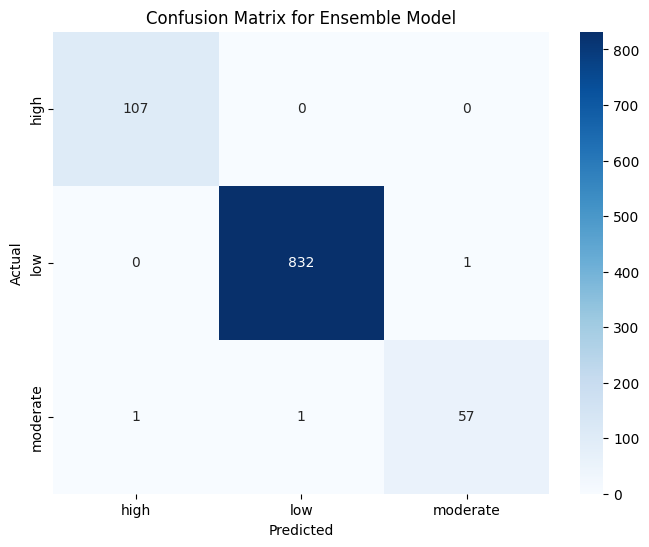

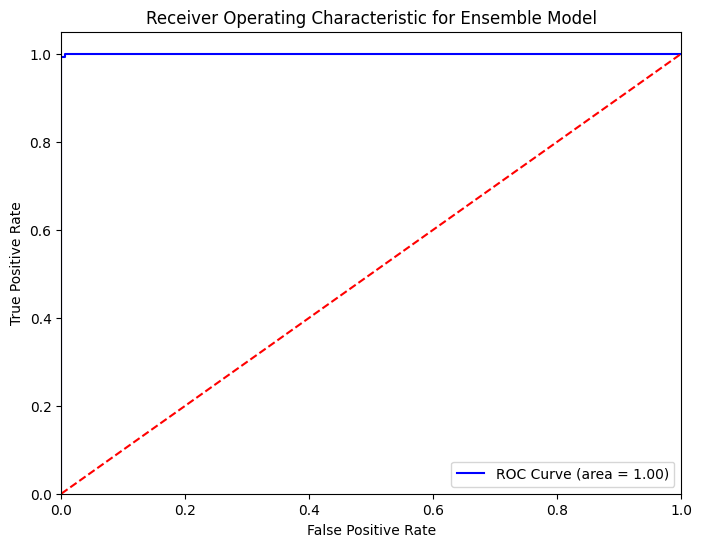

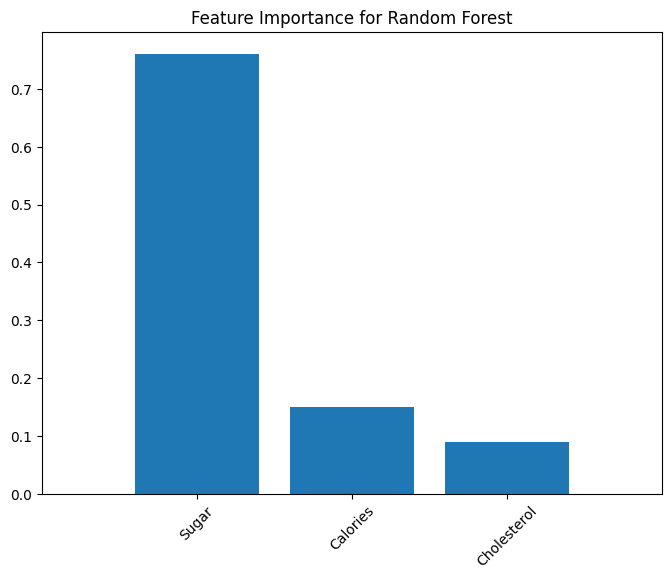

Predicted Risk Category: high


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Load the dataset
import pandas as pd
data = pd.read_csv('/content/USDA.csv')

# Display the first few rows of the dataset
print(data.head())

# Data cleaning: Drop rows with missing target values (if any)
data.dropna(subset=['Cholesterol', 'Sugar', 'Calories'], inplace=True)

# Define risk categories based on dietary guidelines
def categorize_risk(row):
    if row['Sugar'] > 30 or row['Cholesterol'] > 300:
        return 'high'
    elif row['Sugar'] > 20 or row['Cholesterol'] > 200:
        return 'moderate'
    else:
        return 'low'

# Apply risk categorization
data['risk_category'] = data.apply(categorize_risk, axis=1)

# Features and target variable
features = ['Calories', 'Sugar', 'Cholesterol']
X = data[features]
y = data['risk_category']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Classifier': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Evaluate each model and store results
model_reports = {}
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Generate classification report
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
    model_reports[model_name] = report['accuracy']  # Store accuracy for comparison

    # Confusion Matrix Heatmap
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Identify the best model based on accuracy
best_model_name = max(model_reports, key=model_reports.get)
print(f"Best Model: {best_model_name} with Accuracy: {model_reports[best_model_name]:.2f}")

# Create an ensemble model using the best models
ensemble_model = VotingClassifier(estimators=[
    ('logistic', LogisticRegression(max_iter=200)),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42))
], voting='soft')

# Fit the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Make predictions with the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

# Generate classification report for the ensemble model
print(f"Classification Report for Ensemble Model:\n")
print(classification_report(y_test, y_pred_ensemble, target_names=label_encoder.classes_))

# Confusion Matrix Heatmap for the ensemble model
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ensemble, annot=True, fmt='d', cmap='Blues', xticklabels =label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Ensemble Model')
plt.show()

# ROC Curve for Ensemble Model
y_prob_ensemble = ensemble_model.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob_ensemble, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Ensemble Model')
plt.legend(loc='lower right')
plt.show()

# Feature Importance for Random Forest
feature_importance = models['Random Forest'].feature_importances_
indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(8, 6))
plt.title('Feature Importance for Random Forest')
plt.bar(range(X.shape[1]), feature_importance[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(features)[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

# Function to predict risk category based on user input
def predict_risk(calories, sugar, cholesterol):
    input_data = np.array([[calories, sugar, cholesterol]])
    input_data_scaled = scaler.transform(input_data)
    prediction = ensemble_model.predict(input_data_scaled)
    return label_encoder.inverse_transform(prediction)[0]

# Example usage of the prediction function
calories_input = 250  # Example input
sugar_input = 25      # Example input
cholesterol_input = 180  # Example input
predicted_risk = predict_risk(calories_input, sugar_input, cholesterol_input)
print(f"Predicted Risk Category: {predicted_risk}")

In [ ]:
import pandas as pd

# Load the dataset
import pandas as pd
data = pd.read_csv('/content/USDA.csv')

# Display the first few rows of the dataset
print(data.head())

def ingredient_search():
    print("Welcome to the Ingredient Search!")
    ingredient_search = input("Enter an ingredient name to search: ").strip().lower()

    # Filter the dataset based on user input
    filtered_data = data[data['Description'].str.contains(ingredient_search, case=False)]

    if filtered_data.empty:
        print("No ingredients found.")
        return

    print("\nFound Ingredients:")
    for index, row in filtered_data.iterrows():
        print(f"{row['ID']}: {row['Description']}")

    selected_id = int(input("\nEnter the ID of the ingredient you want to add: "))
    if selected_id in filtered_data['ID'].values:
        print(f"Added ingredient with ID: {selected_id}")
    else:
        print("Invalid ID selected.")

# Call the function
ingredient_search()


     ID               Description  Calories  Protein  TotalFat  Carbohydrate  \
0  1001          BUTTER,WITH SALT     717.0     0.85     81.11          0.06   
1  1002  BUTTER,WHIPPED,WITH SALT     717.0     0.85     81.11          0.06   
2  1003      BUTTER OIL,ANHYDROUS     876.0     0.28     99.48          0.00   
3  1004               CHEESE,BLUE     353.0    21.40     28.74          2.34   
4  1005              CHEESE,BRICK     371.0    23.24     29.68          2.79   

   Sodium  SaturatedFat  Cholesterol  Sugar  Calcium  Iron  Potassium  \
0   714.0        51.368        215.0   0.06     24.0  0.02       24.0   
1   827.0        50.489        219.0   0.06     24.0  0.16       26.0   
2     2.0        61.924        256.0   0.00      4.0  0.00        5.0   
3  1395.0        18.669         75.0   0.50    528.0  0.31      256.0   
4   560.0        18.764         94.0   0.51    674.0  0.43      136.0   

   VitaminC  VitaminE  VitaminD  
0       0.0      2.32       1.5  
1       0.0 

In [17]:
import pandas as pd

# Load the dataset
import pandas as pd
data = pd.read_csv('/content/USDA.csv')

# Display the first few rows of the dataset
print(data.head())
def nutritional_insights():
    print("Welcome to the Nutritional Insights Calculator!")

    ingredients = {}

    while True:
        ingredient_name = input("Enter an ingredient (or type 'done' to finish): ").strip()

        if ingredient_name.lower() == 'done':
            break

        quantity = float(input(f"Enter quantity for {ingredient_name} (in grams): "))

        # Check if the ingredient exists in the dataset
        food_data = data[data['Description'].str.contains(ingredient_name, case=False)]

        if not food_data.empty:
            food_row = food_data.iloc[0]
            ingredients[food_row['ID']] = {
                'description': food_row['Description'],
                'quantity': quantity,
                'calories': food_row['Calories'],
                'protein': food_row['Protein'],
                'total_fat': food_row['TotalFat'],
                'carbohydrates': food_row['Carbohydrate'],
                'sugar': food_row['Sugar'],
                'cholesterol': food_row['Cholesterol']
            }
            print(f"Added {quantity}g of {food_row['Description']}.")
        else:
            print("Ingredient not found. Please try again.")

    # Calculate total nutrition information
    total_calories = total_protein = total_fat = total_carbohydrates = total_sugar = total_cholesterol = 0

    for item in ingredients.values():
        total_calories += (item['calories'] * item['quantity'] / 100)
        total_protein += (item['protein'] * item['quantity'] / 100)
        total_fat += (item['total_fat'] * item['quantity'] / 100)
        total_carbohydrates += (item['carbohydrates'] * item['quantity'] / 100)
        total_sugar += (item['sugar'] * item['quantity'] / 100)
        total_cholesterol += (item['cholesterol'] * item['quantity']/100)

    # Display results
    print("\nTotal Nutritional Values:")
    print(f"Total Calories: {total_calories:.2f} kcal")
    print(f"Total Protein: {total_protein:.2f} g")
    print(f"Total Fat: {total_fat:.2f} g")
    print(f"Total Carbohydrates: {total_carbohydrates:.2f} g")
    print(f"Total Sugar: {total_sugar:.2f} g")
    print(f"Total Cholesterol: {total_cholesterol:.2f} mg")

# Call the function
nutritional_insights()


     ID               Description  Calories  Protein  TotalFat  Carbohydrate  \
0  1001          BUTTER,WITH SALT     717.0     0.85     81.11          0.06   
1  1002  BUTTER,WHIPPED,WITH SALT     717.0     0.85     81.11          0.06   
2  1003      BUTTER OIL,ANHYDROUS     876.0     0.28     99.48          0.00   
3  1004               CHEESE,BLUE     353.0    21.40     28.74          2.34   
4  1005              CHEESE,BRICK     371.0    23.24     29.68          2.79   

   Sodium  SaturatedFat  Cholesterol  Sugar  Calcium  Iron  Potassium  \
0   714.0        51.368        215.0   0.06     24.0  0.02       24.0   
1   827.0        50.489        219.0   0.06     24.0  0.16       26.0   
2     2.0        61.924        256.0   0.00      4.0  0.00        5.0   
3  1395.0        18.669         75.0   0.50    528.0  0.31      256.0   
4   560.0        18.764         94.0   0.51    674.0  0.43      136.0   

   VitaminC  VitaminE  VitaminD  
0       0.0      2.32       1.5  
1       0.0 

In [15]:
#without dropdown final
# Load the dataset
import pandas as pd
from IPython.display import display
import ipywidgets as widgets

# Load the dataset
data = pd.read_csv('/content/USDA.csv')

# Display the first few rows of the dataset
print(data.head())

# Function to search ingredients and add them with quantities
def ingredient_search():
    print("Welcome to the Ingredient Search!")

    selected_ingredients = []

    while True:
        ingredient_search = input("Enter an ingredient name to search (or type 'done' to finish): ").strip().lower()

        if ingredient_search == 'done':
            break

        # Filter the dataset based on user input
        filtered_data = data[data['Description'].str.contains(ingredient_search, case=False)]

        if filtered_data.empty:
            print("No ingredients found.")
            continue

        print("\nFound Ingredients:")
        for index, row in filtered_data.iterrows():
            print(f"{row['ID']}: {row['Description']}")

        try:
            selected_id = int(input("\nEnter the ID of the ingredient you want to add: "))
            if selected_id in filtered_data['ID'].values:
                quantity = float(input("Enter the quantity in grams: "))
                selected_ingredients.append((selected_id, quantity))
                print(f"Added {quantity}g of {filtered_data[filtered_data['ID'] == selected_id]['Description'].values[0]}.")
            else:
                print("Invalid ID selected. Please try again.")
        except ValueError:
            print("Invalid input. Please enter a numeric ID and quantity.")

    return selected_ingredients

# Function to assess health risk and calculate nutrition
def assess_health_risk_and_calculate(selected_ingredients, age, gender, weight):
    # Initialize totals
    total_calories = total_sugar = total_saturated_fats = total_cholesterol = 0
    total_protein = total_fat = total_carbohydrates = 0

    for food_id, quantity in selected_ingredients:
        food_row = data[data['ID'] == food_id].iloc[0]
        factor = quantity / 100  # Nutritional values are per 100g

        total_calories += food_row['Calories'] * factor
        total_sugar += food_row['Sugar'] * factor
        total_saturated_fats += food_row['SaturatedFat'] * factor
        total_cholesterol += food_row['Cholesterol'] * factor
        total_protein += food_row['Protein'] * factor
        total_fat += food_row['TotalFat'] * factor
        total_carbohydrates += food_row['Carbohydrate'] * factor

    # Determine optimal calorie limit based on age and gender
    if age < 19:
        calorie_limit = 2400 if gender == 'male' else 1800
    elif age < 31:
        calorie_limit = 3000 if gender == 'male' else 2400
    elif age < 60:
        calorie_limit = 3000 if gender == 'male' else 2200
    else:
        calorie_limit = 2600

    # Assess risks based on dietary guidelines
    sugar_risk = total_sugar > (30 if gender == 'male' else (24 if age < 10 else (19 if age < 7 else 30)))
    saturated_fat_risk = total_saturated_fats > (calorie_limit * 0.1)
    cholesterol_risk = total_cholesterol > 300

    # Calculate protein needs
    protein_needs = weight * 0.8

    # Compile results
    results = {
        "Total Calories": total_calories,
        "Total Sugar": total_sugar,
        "Total Saturated Fats": total_saturated_fats,
        "Total Cholesterol (mg)": total_cholesterol,
        "Total Protein": total_protein,
        "Total Fat": total_fat,
        "Total Carbohydrates": total_carbohydrates,
        "Sugar Risk": sugar_risk,
        "Saturated Fat Risk": saturated_fat_risk,
        "Cholesterol Risk": cholesterol_risk,
        "Optimal Calories": calorie_limit,
        "Protein Needs": protein_needs,
    }

    # Suggestions for weight management
    if total_calories > calorie_limit:
        results["Suggestion"] = ("To lose weight, you can consume fewer calories than your body needs, "
                                  "creating a calorie deficit. A safe and sustainable rate of weight loss "
                                  "is about 1–2 pounds per week, which is a calorie deficit of "
                                  "500–1,000 calories per day.")
    elif total_calories < calorie_limit:
        results["Suggestion"] = ("To gain weight, you can consume more calories than your body needs. "
                                  "Aim for a surplus of about 250–500 calories per day for gradual weight gain.")
    else:
        results["Suggestion"] = "Your caloric intake is optimal for your age and gender."

    return results

# Main execution
selected_ingredients = ingredient_search()
age_input = int(input("Enter your age: "))
gender_input = input("Enter your gender (male/female): ").lower()
weight_input = float(input("Enter your weight in kg: "))

if selected_ingredients:
    assessment_results = assess_health_risk_and_calculate(selected_ingredients, age_input, gender_input, weight_input)
    for key, value in assessment_results.items():
        print(f"{key}: {value}")


     ID               Description  Calories  Protein  TotalFat  Carbohydrate  \
0  1001          BUTTER,WITH SALT     717.0     0.85     81.11          0.06   
1  1002  BUTTER,WHIPPED,WITH SALT     717.0     0.85     81.11          0.06   
2  1003      BUTTER OIL,ANHYDROUS     876.0     0.28     99.48          0.00   
3  1004               CHEESE,BLUE     353.0    21.40     28.74          2.34   
4  1005              CHEESE,BRICK     371.0    23.24     29.68          2.79   

   Sodium  SaturatedFat  Cholesterol  Sugar  Calcium  Iron  Potassium  \
0   714.0        51.368        215.0   0.06     24.0  0.02       24.0   
1   827.0        50.489        219.0   0.06     24.0  0.16       26.0   
2     2.0        61.924        256.0   0.00      4.0  0.00        5.0   
3  1395.0        18.669         75.0   0.50    528.0  0.31      256.0   
4   560.0        18.764         94.0   0.51    674.0  0.43      136.0   

   VitaminC  VitaminE  VitaminD  
0       0.0      2.32       1.5  
1       0.0 

In [13]:
# Load the dataset
import pandas as pd
from IPython.display import display
import ipywidgets as widgets

# Load the dataset
data = pd.read_csv('/content/USDA.csv')

# Display the first few rows of the dataset
print(data.head())

# Function to search ingredients and add them with quantities
def ingredient_search():
    print("Welcome to the Ingredient Search!")

    selected_ingredients = []

    def on_search_change(change):
        ingredient_search = search_box.value.strip().lower()
        filtered_data = data[data['Description'].str.contains(ingredient_search, case=False)]

        if filtered_data.empty:
            dropdown.options = ["No ingredients found"]
        else:
            dropdown.options = [(f"{row['Description']} (ID: {row['ID']})", row['ID']) for _, row in filtered_data.iterrows()]

    def on_add_ingredient(change):
        selected_id = dropdown.value
        quantity = quantity_input.value
        if selected_id != "No ingredients found":
            selected_ingredients.append((selected_id, quantity))
            selected_description = description_dict[selected_id]
            print(f"Added {quantity}g of {selected_description}.")
            # Display updated selected ingredients
            update_selected_ingredients_display()

    def update_selected_ingredients_display():
        selected_display.clear_output()
        with selected_display:
            for ingredient_id, quantity in selected_ingredients:
                description = description_dict[ingredient_id]
                print(f"{description} ({quantity}g)")

    # Create a dictionary for quick access to descriptions
    description_dict = pd.Series(data.Description.values, index=data.ID).to_dict()

    # Input box for ingredient search
    search_box = widgets.Text(
        placeholder='Enter an ingredient name to search',
        description='Search:',
        layout=widgets.Layout(width='400px')
    )
    search_box.observe(on_search_change, names='value')
    display(search_box)

    # Dropdown to select ingredient
    dropdown = widgets.Dropdown(
        options=["No ingredients found"],
        description='Select:',
        layout=widgets.Layout(width='500px')
    )
    display(dropdown)

    # Input box for quantity
    quantity_input = widgets.BoundedFloatText(
        value=100,
        min=0,
        max=10000,
        step=1,
        description='Quantity (g):',
        layout=widgets.Layout(width='400px')
    )
    display(quantity_input)

    # Button to confirm addition
    add_button = widgets.Button(
        description='Add Ingredient',
        button_style='success'
    )
    add_button.on_click(on_add_ingredient)
    display(add_button)

    # Display for selected ingredients
    selected_display = widgets.Output()
    display(selected_display)

    # Button to finalize ingredient selection
    done_button = widgets.Button(
        description='Done',
        button_style='primary'
    )
    display(done_button)

    def on_done(button):
        print("Finalizing ingredient selection...")
        display(widgets.HTML("<h3>Calculating Nutritional Insights...</h3>"))
        done_button.close()
        add_button.close()
        search_box.close()
        dropdown.close()
        quantity_input.close()
        selected_display.close()

    done_button.on_click(on_done)
    return selected_ingredients

# Function to assess health risk and calculate nutrition
def assess_health_risk_and_calculate(selected_ingredients, age, gender, weight):
    # Filter data for selected IDs
    selected_ids = [item[0] for item in selected_ingredients]
    filtered_data = data[data['ID'].isin(selected_ids)].copy()

    # Add quantity factor to the filtered data
    quantities = {item[0]: item[1] for item in selected_ingredients}
    filtered_data['Quantity'] = filtered_data['ID'].map(quantities)
    filtered_data['Factor'] = filtered_data['Quantity'] / 100

    # Calculate total nutrient values using vectorized operations
    total_nutrients = (filtered_data[['Calories', 'Sugar', 'SaturatedFat', 'Cholesterol', 'Protein', 'TotalFat', 'Carbohydrate']] * filtered_data['Factor'].values[:, None]).sum()

    # Determine optimal calorie limit based on age and gender
    if age < 19:
        calorie_limit = 2400 if gender == 'male' else 1800
    elif age < 31:
        calorie_limit = 3000 if gender == 'male' else 2400
    elif age < 60:
        calorie_limit = 3000 if gender == 'male' else 2200
    else:
        calorie_limit = 2600

    # Assess risks based on dietary guidelines
    sugar_risk = total_nutrients['Sugar'] > (30 if gender == 'male' else (24 if age < 10 else (19 if age < 7 else 30)))
    saturated_fat_risk = total_nutrients['SaturatedFat'] > (calorie_limit * 0.1)
    cholesterol_risk = total_nutrients['Cholesterol'] > 300

    # Calculate protein needs
    protein_needs = weight * 0.8

    # Compile results
    results = {
        "Total Calories": total_nutrients['Calories'],
        "Total Sugar": total_nutrients['Sugar'],
        "Total Saturated Fats": total_nutrients['SaturatedFat'],
        "Total Cholesterol (mg)": total_nutrients['Cholesterol'],
        "Total Protein": total_nutrients['Protein'],
        "Total Fat": total_nutrients['TotalFat'],
        "Total Carbohydrates": total_nutrients['Carbohydrate'],
        "Sugar Risk": sugar_risk,
        "Saturated Fat Risk": saturated_fat_risk,
        "Cholesterol Risk": cholesterol_risk,
        "Optimal Calories": calorie_limit,
        "Protein Needs": protein_needs,
    }

    # Suggestions for weight management
    if total_nutrients['Calories'] > calorie_limit:
        results["Suggestion"] = ("To lose weight, you can consume fewer calories than your body needs, "
                                  "creating a calorie deficit. A safe and sustainable rate of weight loss "
                                  "is about 1–2 pounds per week, which is a calorie deficit of "
                                  "500–1,000 calories per day.")
    elif total_nutrients['Calories'] < calorie_limit:
        results["Suggestion"] = ("To gain weight, you can consume more calories than your body needs. "
                                  "Aim for a surplus of about 250–500 calories per day for gradual weight gain.")
    else:
        results["Suggestion"] = "Your caloric intake is optimal for your age and gender."

    return results

# Main execution
selected_ingredients = ingredient_search()
age_input = int(input("Enter your age: "))
gender_input = input("Enter your gender (male/female): ").lower()
weight_input = float(input("Enter your weight in kg: "))

if selected_ingredients:
    assessment_results = assess_health_risk_and_calculate(selected_ingredients, age_input, gender_input, weight_input)
    for key, value in assessment_results.items():
        print(f"{key}: {value}")

     ID               Description  Calories  Protein  TotalFat  Carbohydrate  \
0  1001          BUTTER,WITH SALT     717.0     0.85     81.11          0.06   
1  1002  BUTTER,WHIPPED,WITH SALT     717.0     0.85     81.11          0.06   
2  1003      BUTTER OIL,ANHYDROUS     876.0     0.28     99.48          0.00   
3  1004               CHEESE,BLUE     353.0    21.40     28.74          2.34   
4  1005              CHEESE,BRICK     371.0    23.24     29.68          2.79   

   Sodium  SaturatedFat  Cholesterol  Sugar  Calcium  Iron  Potassium  \
0   714.0        51.368        215.0   0.06     24.0  0.02       24.0   
1   827.0        50.489        219.0   0.06     24.0  0.16       26.0   
2     2.0        61.924        256.0   0.00      4.0  0.00        5.0   
3  1395.0        18.669         75.0   0.50    528.0  0.31      256.0   
4   560.0        18.764         94.0   0.51    674.0  0.43      136.0   

   VitaminC  VitaminE  VitaminD  
0       0.0      2.32       1.5  
1       0.0 

Text(value='', description='Search:', layout=Layout(width='400px'), placeholder='Enter an ingredient name to s…

Dropdown(description='Select:', layout=Layout(width='500px'), options=('No ingredients found',), value='No ing…

BoundedFloatText(value=100.0, description='Quantity (g):', layout=Layout(width='400px'), max=10000.0, step=1.0…

Button(button_style='success', description='Add Ingredient', style=ButtonStyle())

Output()

Button(button_style='primary', description='Done', style=ButtonStyle())

Enter your age: 20
Enter your gender (male/female): male
Enter your weight in kg: 72
